In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import cm
import random
import math
from matplotlib.animation import FuncAnimation
#plt.style.use('_mpl-gallery')
from numpy import cos, sin, pi, exp 

**The required packages for animation and other mathematical operations are imported.**

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [2]:
def f1(x):
    return x ** 2 + 3 * x + 8
def f1_dx(x):
    return 2*x + 3

In [3]:
xbase = np.linspace(-5, 5, 100)
ybase = f1(xbase)
#plt.plot(xbase, ybase)

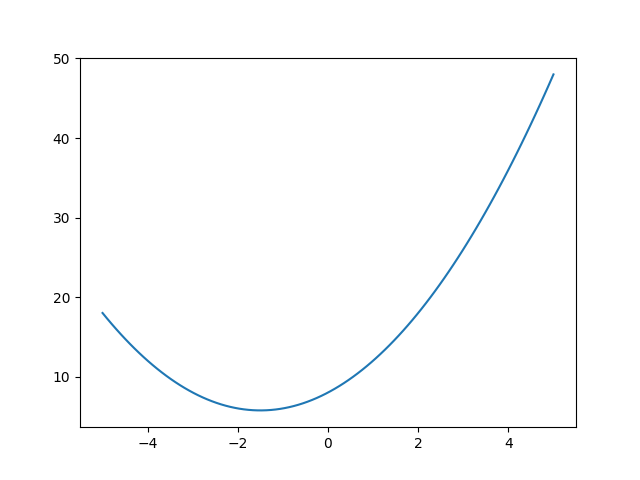

In [4]:
bestcost = 100000
bestx = 0
rangemin, rangemax = -5, 5
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - f1_dx(bestx) * lr 
    bestx = x
    y = f1(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

**The above code is the basic gradient descent algorithm for optimizing the one variable function.**

In [5]:
print("Minimum value of the function is ",f1(bestx),"and occurs at x =",bestx)

Minimum value of the function is  5.766602069666338 and occurs at x = -1.37115098112


## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [11]:
def func(f,lis,rang):
    l=len(lis)
    global bestcost, bestl,bestx, besty,lr
    if l>2: #This part works for all polynomials but the condition is given because 
             #2-D polynomials can be visualised and optimized with the help of 3-D animation
        bestcost = 100000 #The cost functions value, though not updated at every iteration
        bestl = [random.uniform(*x) for x in rang] # random starting points for different variables
        lr = 0.1  # learning rate

        def onestepderiv():
            global bestcost, bestl, lr
            for i in range(l):
                bestl[i] -= lr * lis[i](*bestl) #gradient descent 
                if bestl[i]<rang[i][0] or bestl[i]>rang[i][1]: #loop breaks if the point goes outside the given range
                    break
            bestcost= f(*bestl) #final minimum value

        for i in range(100): #number of iterations can be increased here 
            onestepderiv()
        print("Minimum at ",*bestl)
        print("Minimum value=",bestcost)
        return
    
    #for 2-D polynomials
    xbase = np.linspace(rang[0][0], rang[0][1], 100)
    ybase = np.linspace(rang[1][0], rang[1][1], 100)
    X, Y = np.meshgrid(xbase, ybase)
    Z = f(X, Y)

    bestcost = 100000
    #s0 = np.random.randint(-10,10)
    #print(s0)
    bestx = random.uniform(*rang[0]) #randomised the starting values within the given range
    besty = random.uniform(*rang[1])
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d') #creating figure and axis objects
    ax.plot_surface(X, Y, Z,rstride=1, cstride=1,cmap='gist_rainbow', alpha=0.4) #to plot surface with all points with
                                                                                 #required colour(cmap) and intensity(alpha)
    ax.set_title('Gradient Descent',fontsize='large',fontweight='bold',style='italic') #title for the plot
    #ax.set_xlim3d([-10, 10])-limits can be set if there is any abnormality in the function while plotting
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    x_all, y_all, z_all = [], [], []

    lnall,  = ax.plot([], [], [], 'ro')
    lngood, = ax.plot([], [], [], 'bo', markersize=10)

    lr = 0.1  # learning rate
    df_dx=lis[0]
    df_dy=lis[1]
    def onestepderiv(frame):
        global bestcost, bestx, besty, lr
        if bestx<rang[0][0] or bestx>rang[0][1]or besty<rang[1][0] or besty>rang[1][1]: #no change in the points if any 
            lr=0                                                                        #variable goes outside the given range
        #print(bestx, besty, f(bestx, besty))
        bestx -= lr * df_dx(bestx, besty)
        besty -= lr * df_dy(bestx, besty)
        x_all.append(bestx)
        y_all.append(besty)
        z_all.append(f(bestx, besty))
        lngood.set_data_3d(bestx, besty, f(bestx, besty))
        lnall.set_data_3d(x_all, y_all, z_all)
        #print(x_all)
        return lngood,
    ani = FuncAnimation(fig, onestepderiv, frames=range(40), interval=1000, repeat=False)
    plt.show()
    return ani

* **The above function prints the minimum for n-D polynomial and animates the optimization for 2-D polynomial. With a few changes, it can also work for both 1-D and 2-D polynomials.**
* **The above function takes the function to be optimized as its first parameter, a list of the functions for partial derivatives of the function with respect to different variables and a list of their corresponding ranges to find the minimum point as the other two parameters.**
* **For N>2, the above code prints the minima location and value and for 2-D, it animates the optimization process and attempts to find the required point within the given range.**
* **The animation is halted when the point reaches reached the given boundaries and the same point is plotted over and over again.**
* **Learning rate lr and starting point can also be taken as an input parameter to optimize it more efficiently. Since random starting points are chosen, we get the required minimum point for abnormal functions with peaks; as well.**

In [12]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

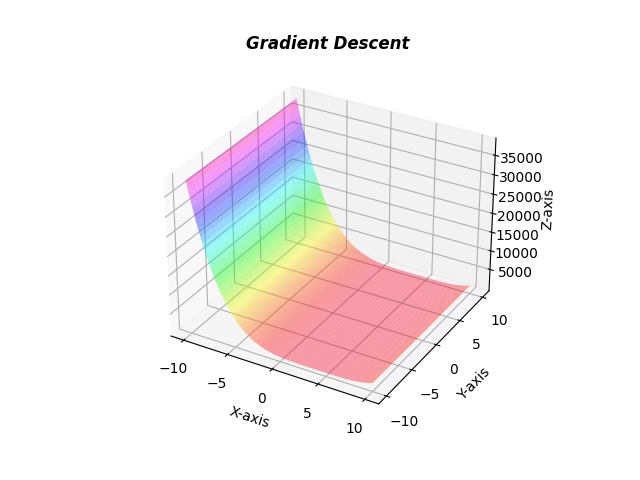

In [13]:
func(f3,[df3_dx,df3_dy],[xlim3,ylim3]) #[[3,5],[1,3]]) range can be changed for better visualisation and best optimization

In [14]:
print("Minimum value of the function is ",f3(bestx,besty),"and occurs at x =",bestx,"and y =",besty)

Minimum value of the function is  2.000243038757617 and occurs at x = 4.124858715036899 and y = 1.9999928239640894


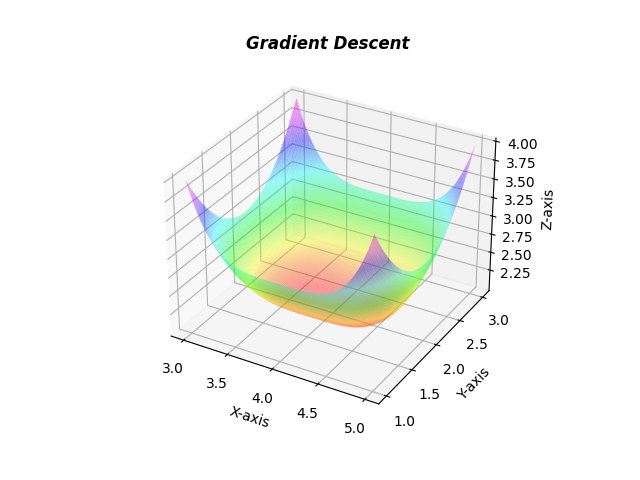

In [19]:
func(f3,[df3_dx,df3_dy],[[3,5],[1,3]])

In [24]:
print("Minimum value of the function is ",f3(bestx,besty),"and occurs at x =",bestx,"and y =",besty)

Minimum value of the function is  2.000740831190626 and occurs at x = 4.16497919520407 and y = 1.9999342305923034


## Problem 3 - 2-D function 

Derivatives and limits given. 

In [25]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def df4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def df4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

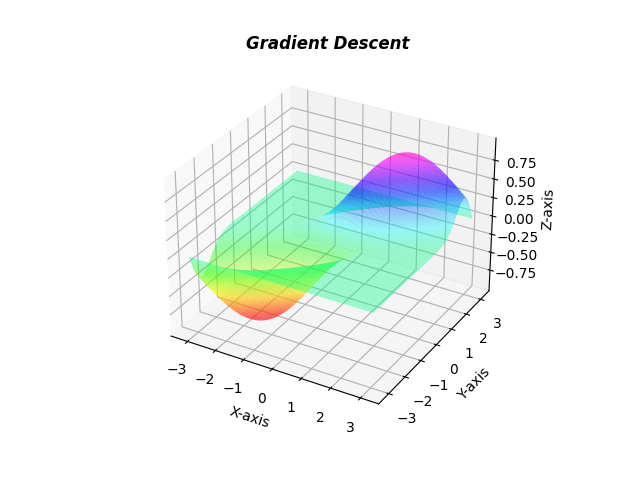

In [27]:
func(f4,[df4_dx,df4_dy],[xlim4,xlim4])#[xlim4,xlim4])

In [29]:
print("Minimum value of the function is ",f4(bestx,besty),"and occurs at x =",bestx,"and y =",besty)

Minimum value of the function is  -0.9949666328319867 and occurs at x = -1.4499931412086569 and y = -1.4794353262097972


## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [30]:
def f5(x,y=0):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def df5_dx(x):
    return -4*sin(x)*cos(x)**3 -3*cos(x)*sin(x)**2 -8*sin(x)*cos(x) -sin(x)
def df5_dy(y):
    return 0

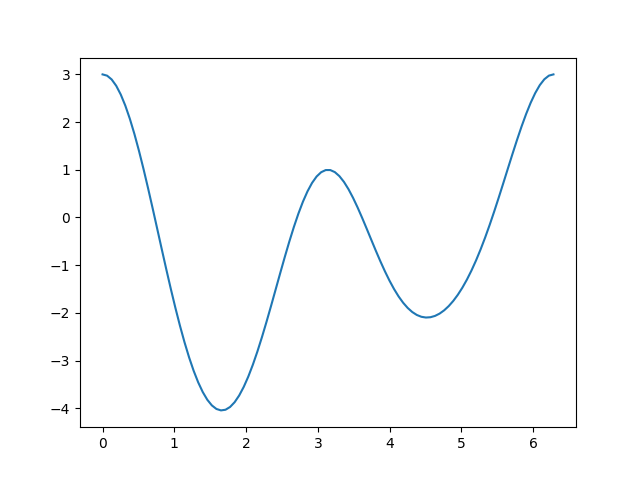

In [31]:
xbase = np.linspace(0, 2*pi, 100)
ybase = f5(xbase,0)
plt.plot(xbase, ybase)
bestcost = 100000
bestx = 3
rangemin, rangemax = 0, 2*pi
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - df5_dx(bestx) * lr 
    bestx = x
    y = f5(x,0)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    #return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False) 
plt.show()

In [32]:
print("Minimum value of the function is ",f5(bestx,besty),"and occurs at x =",bestx)

Minimum value of the function is  -4.045412051572552 and occurs at x = 1.6616608124091983
